In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.384000e+03,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1.384000e+03,1384.000000,1384.000000
mean,1.520314e+09,9120.695173,9123.620838,9122.345903,9122.156763,1.196086,0.065703,9.055879e+05,0.063706,0.104648
std,2.410231e+04,204.848456,203.261988,203.977973,203.939035,3.732348,0.025408,2.711610e+05,0.028092,0.042545
min,1.520272e+09,8670.000000,8682.000000,8681.970000,8680.430000,0.001000,-0.015150,3.329640e+05,-0.002483,0.025257
25%,1.520293e+09,8894.970000,8896.877500,8895.400000,8895.400000,0.109850,0.047618,7.304010e+05,0.038833,0.053507
50%,1.520314e+09,9154.000000,9155.010000,9154.205000,9154.040000,0.337242,0.065601,8.481595e+05,0.066204,0.111988
75%,1.520335e+09,9327.602500,9327.937500,9327.850000,9327.602500,1.043467,0.087152,1.173600e+06,0.086548,0.139578
max,1.520356e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.118355,1.365095e+06,0.102910,0.174146


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.900023,-0.900757,-0.900614,-0.900498,0.174090,-0.228991,-0.889556,-0.449689,-0.342719
low,-0.900023,1.000000,0.999174,0.999395,0.999679,-0.204986,0.133869,0.772495,0.498159,0.214251
high,-0.900757,0.999174,1.000000,0.999739,0.999632,-0.176844,0.135163,0.774760,0.500598,0.215670
open,-0.900614,0.999395,0.999739,1.000000,0.999423,-0.180430,0.133955,0.774190,0.500022,0.215011
close,-0.900498,0.999679,0.999632,0.999423,1.000000,-0.191087,0.135258,0.773528,0.499526,0.215394
volume,0.174090,-0.204986,-0.176844,-0.180430,-0.191087,1.000000,0.050460,-0.155470,-0.059382,-0.018706
tw_sentiment,-0.228991,0.133869,0.135163,0.133955,0.135258,0.050460,1.000000,0.038588,-0.076116,0.383980
tw_followers,-0.889556,0.772495,0.774760,0.774190,0.773528,-0.155470,0.038588,1.000000,0.653525,0.125978
reddit_sentiment,-0.449689,0.498159,0.500598,0.500022,0.499526,-0.059382,-0.076116,0.653525,1.000000,-0.428953
google_sentiment,-0.342719,0.214251,0.215670,0.215011,0.215394,-0.018706,0.383980,0.125978,-0.428953,1.000000


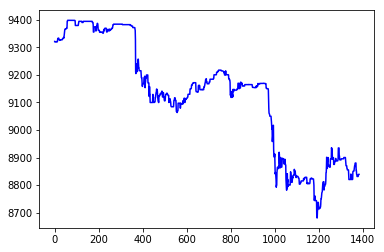

In [4]:
plt.plot(df['close'], 'b')

In [5]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [6]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 150)            93600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
__________

([<matplotlib.lines.Line2D at 0x11ad44940>], 'g')

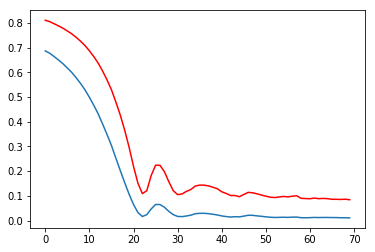

In [7]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

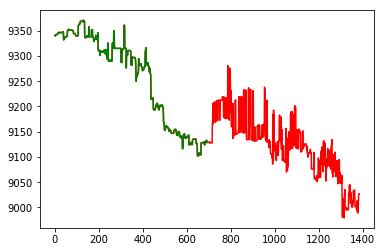

In [8]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [9]:
engine.test_order_percent(df, model, scaler_x, scaler_y)
int(0.1 * df['close'].count())

Error Order percentage: 29.19%


138